### 문제정의
- 버섯의 특징을 활용해서 식용인지 독성인지 분류해보자

### 문제데이터 수집

In [1]:
#  데이터 가져오기
import pandas as pd
data = pd.read_csv('./Data/mushroom.csv')
data.head()


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# 데이터 갯수 확인
data.keys
# 행(8124), 열(특성 22개, 정답 1개)
data.shape # (행, 열)의 형태로 가져옴

(8124, 23)

### 데이터 전처리

In [3]:
# 결측치
data.info()
# 데이터에 결측치가 없다.

# 이상치
data.describe() # 수치 자료값만 통계로 확인시켜줌 
#describe() : 숫자인 컬럼에서만 의미가 있음
# 문자열로 이루어진 칼럼 
# unique : 컬럼을 구성하고 있는 문자의 가지수
# top : 어떤 데이터가 가장 많은지
# freq : top의 빈도수 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 데이터 탐색적 분석
- 일단 생략 : 데이터에 수치형 데이터가 없기 때문에 시각화하기가 어려움

### 모델 선택 및 하이퍼파라미터 튜닝

#### 모델 불러오기

In [4]:
# DecsisionTree 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier() #프럼에서 모델을 가져오면 클래스로 변환되기 때문에 소괄호 필요

#### 데이터 나누기

##### 문제와 정답데이터로 나누기

In [5]:
X = data.loc[:, 'cap-shape' : ] #loc ['가져오고싶은 문자행', '가져오고 싶은 문자 열'] 문자로 가져와도 슬라이싱 가능 
#문제

y =data.loc[:,'poisonous']
#정답

print(X)
print(y)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

##### 문제를 숫자로 만들기 

In [6]:
X1 = X.copy()    # <==== 데이터를 변형하면서 원본은 납둬야 한다. copy()는 데이터를 복사해줌. : 다른 주소로 X, X1은 전혀 별개의 데이터, X1의 값이 바뀌어도 X에는 반영 안됨
X1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


###### Label 인코딩
- 하나의 값에 하나의 숫자를 대입
- 많이 사용되는 방법은 아님
  - 이유는? 값을 변경함에 있어서 사용의 개입이 들어감.
  - 원래 문자가 가지고 있던 의미는 사라지고 사용자가 임의대로 값을 바꿔버림.

In [39]:
X1['cap-shape'].unique()
# 총 6개의 값을 값이 가지고 있는 순서대로 번호(1~6)을 문자값에 매칭되는 수치형 데이터로 변형
 # 'x' : 1 , 'b ' : 2
 # => 파이썬의 인덱스 갠며을 적용해서 0~5번으로 변경

array([nan])

In [44]:
# Label 인코딩 : map함수 
# map()을 적용하기 위해 딕셔너리형태로 값을 저장
trans = {'x' : 0, 'b' : 1, 's' : 2, 'f':3,'k':4 , 'c' : 5}

# key값을 value 값으로 변경
X1['cap-shape'] = X1['cap-shape'].map(trans)

#map() 함수를 쓸 떄 주의할 점 : 가지고 있는 대상을 전부 바꿔줘야함(일부만 변경하면 오류가 발생하게됨.)

In [45]:
X1['cap-shape'].value_counts() # 값이 바뀌는 것을 decribe() 수치와 비교 호가인 

Series([], Name: cap-shape, dtype: int64)

###### One-hot 인코딩
- 컬럼이 가지고 있는 데이터만큼의 컬럼을 또 생성
- 0과 1로 데이터를 표시
- 데이터가 늘어나는 효과를 얻음
- Label인코딩보다 더욱 많이 사용하게됨.

- Label vs One_hot
    - Label : 기존에 가지고 있던 데이터의 의미가 사라짐
    - One-hot : 장점1. 기존에 가지고 있는 데이터의 의미 유지 
                    2. 데이터가 늘어나는 효과 - 가지수가 많아짐
![img.png]

In [10]:
# One-hot 인코딩 진행하는 함수 : pd.get_dummies(대상)
X2 = X.copy()
X_onehot = pd.get_dummies(X2)
X_onehot.head() #X_onehot에는 숫자형 데이터가 담겨있음. 원래 문자로 담겨 있는 컬럼은 cap-shape_'b' 처럼 뒤에 문자로 나누어져 있음.

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### 훈련과 평가 데이터로 나누기(train/test)

In [60]:
#문제와 정답데이터를 훈련과 평가용으로 다시 나눠주기 -> 함수이름
# 문제 : X_onehot
# 정답 : y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.7)

In [66]:
X_train.shape

(2437, 117)

### 학습

In [67]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 평가

In [68]:
# 보통 1.0 => 과대적합
tree_model.score(X_train, y_train)

1.0

In [69]:
tree_model.score(X_test, y_test)

# 학습용, 평가용 모두 1.0
# 1.뭔가 잘못됐다 : 99%
# 2.지나치게 학습이 잘 됐다 : 1% --> 데이터가 구분하기 좋은 데이터로 구성되어있어서 학습이 잘 됬다.

1.0

### 알고리즘 시각화

In [16]:
# 시각화 패키지 설치하기 
#graphviz.org/download/
!pip install graphviz

# 문제가 생기면 !conda install graphviz

In [17]:
# 1. 알고리즘 표현단계
# tree가 가지고 있는 알고리즘을 밖으로 내보내겠다는 의미 =. export
# tree_model1 = DecisionTreeClassifier()
# tree_model1.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(tree_model, # 알고리즘으로 내보낼 모델
                out_file = 'tree.dot',
                # tree.dot 파일의 형태로 알고리즘을 내보낸다.
                class_names = ['p','e'],
                # 정답을 어떻게 표시할 것인지를 명시
                # 한글도 지원이 되지만 마지막에 그림으로 저장했을 때 
                # 한글이 깨지는 경우가 있어 영어로 명시 권장 
                feature_names = X_onehot.columns,
                # feature names 
                # 원래는 특성의 번호를 표시하지만,
                # 특성의 이름을 지정해주면 지정한 특성의 이름으로 표시
                impurity = True,
                # 불순도로 기본값: 지니, 엔트로피의 값을 사용할 수 있음. 
                filled = True )
                # 클래스 별로 색의 변화를줄것인지 설명 
                # (연한색상 - 분류는 잘 안되었지만 같은 계열 색상으로 표시)
# 이 코드의 결과로 tree.dot 파일을 생성

In [18]:
# 2. 환경변수 설정
# graphviz를 파이썬에서 사용하기 위해서 폴더에 경로를 지정
import os 
os.environ['PATH'] += os.pathsep + 'C:/\Program Files/Graphviz/bin'

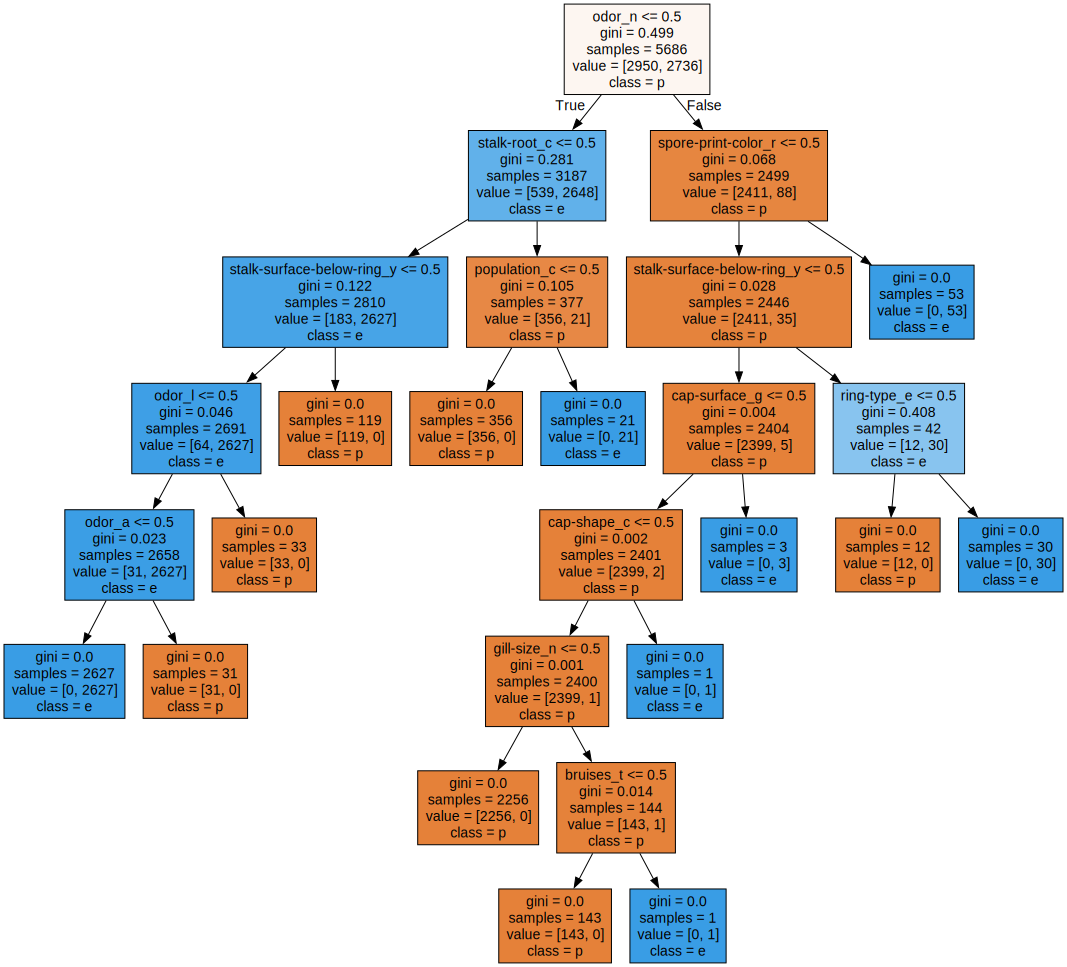

In [19]:
# 3. 알고리즘 그리기 
# 1단계에서 글로 표현된 알고리즘을 그림으로 표현하는 단계 
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    # tree.dot 파일을 열어서 f라는 변수에 대입하고 
    dot_graph = f.read()
    # f 라는 파일을 읽어서 dot_graph라는 변수에 값을 대입.
    

#dot_graph에 있는 내용을 그림으로 출력
display(graphviz.Source(dot_graph))

#전체데이터 8124 -> 학습에 사용한 데이터 5686

#특성, 불순도 -> 앞으로 질문할 특성
#샘플수, 정답값(p,e), 예측클래스  ---> 현재 내 노드의 데이터 정보 
# 마지막 리프노드를 확인해보면 질문한 특성(지니계수, 불순도)이 없음. 4개의 요소만 존재, 지니계수는 0으로 측정됨.

In [20]:
# 4, 3단계에서 그린 그림을 파일 형태(png, jpg, ...)로 저장하기
from subprocess import check_call
# check_call 이 정상적으로 실행되면 0이 출력
check_call(['dot', '-Tpng','tree.dot', '-o', 'tree.png'])

0

### 교차검증
- 훈련과 평가를 여러번 진행하면서 검증의 효과를 얻기 위한 방법 
- 전체 데이터가 축소되지 않기 떄문에 적은 데이터에서도 효과를 얻을 수 있음

- 앞으로는 7.평가 단계에서 교차검증 수행하기
 - 어떻게? 평가단계에서 score() 대신 --> cross_val_score(tree_model, x_onehot, y, cv=5).mean()로 확인

In [79]:
# 교차검증 라이브러리 꺼내오기
from sklearn.model_selection import cross_val_score

cross_val_score(tree_model, X_onehot, y, cv=5)

array([1.        , 1.        , 0.99630769, 1.        , 0.72413793])

In [85]:
# mean()함수를 사용
cross_val_score(tree_model, X_onehot, y, cv=5).mean()
# 기존 평가에서는 완벽한 1이 나왔지만
# 교차검증을 해보니 0.944정도가 나왔다고 확인할 수 있음.

0.9963058734369079

### 특성 선택 
- 데이터가 엄청 많아지게 되면 데이터를 줄일 필요 있음. 
    1. 학습량이 늘어나면 시간이 많이 소요됨(성능저하)
    2. 쓸모없는 데이터가 발생(규칙을 찾는 데 도움이 안되는 데이터) -> 불필요한 계산이나 시간이 소요됨.
- 쓸모있는 데이터만 남기자

In [24]:
tree_model

DecisionTreeClassifier()

In [27]:
# 사용한 특성의 중요도 확인 
fi = tree_model.feature_importances_
fi 
# 117개에 대한 중요도를 표시
# 0~ 1 사이의 값으로 표시
# 전체 117개의 중요도 합이 1 ===> 총합이 1
# 1에 가까울수록 중요한 특성 

array([0.00000000e+00, 7.03600016e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10728790e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.99587904e-04, 2.15841791e-02, 0.00000000e+00,
       0.00000000e+00, 2.24302522e-02, 0.00000000e+00, 6.24693131e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.59868972e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81001665e-01, 0.00000000e+00, 0.00000000e+00,
      

In [28]:
X_onehot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
# 특성의 중요도를 확인하기 위해 데이터프레임의 형태로 변환
df=pd.DataFrame(fi, index=X_onehot.columns)

# 가장 많이 사용된 특성들만 확인해보기
# 0이라는 컬럼을 기준으로 내림차순 정렬로 값 확인
df.sort_values(by=0, ascending=False)



,0
odor_n,0.624693
stalk-root_c,0.181002
stalk-surface-below-ring_y,0.091260
spore-print-color_r,0.035507
odor_l,0.022430
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000


In [36]:
# 사용된 특성(중요도가 0이 아닌 특성들)만 보고싶다 -> 불리언인덱싱
df[df[0] != 0]
# 실제 버섯의 독성/식용 분류에 사용된 특성은 12개
# 만약 시간이 부족해서 데이터를 줄여야 한다면 특성 중요도의 값이 작은 것부터 없애고 학습시킨다.

,0
cap-shape_c,0.000704
cap-surface_g,0.002107
bruises_t,0.000700
odor_a,0.021584
odor_l,0.022430
odor_n,0.624693
gill-size_n,0.000005
stalk-root_c,0.181002
stalk-surface-below-ring_y,0.091260
ring-type_e,0.006038
